In [ ]:
#Going to make all my graphs pretty once analysis is completed

# Capstone EDA
## Questions:
* What does generation look like over time?
* What types of generation/fuel type are growing/shrinking?
* When did these changes occur?

In [8]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.font_manager import FontProperties

   fontP = FontProperties()
   fontP.set_size('small')
   legend([plot1], "title", prop = fontP)

Populating the interactive namespace from numpy and matplotlib


In [9]:
#bring in data
df1 = pd.read_csv('seds_all_states_long.csv')
#sort on state
df1 = df1.sort_values(['state'])
#drop 0 columns because this dataframe will be used as the master for total generation, so zeros will get summed out
#group by year and state, so we can see everything in chronological order
df1 = df1[df1.value != 0].groupby(['year','state']).sum()
df1.index.names = ['year','state']
df1.columns = ['sumgen']

#make some copies that we can play around with and graph for meaning
copy1 = df1.copy()
copy2 = df1.copy()




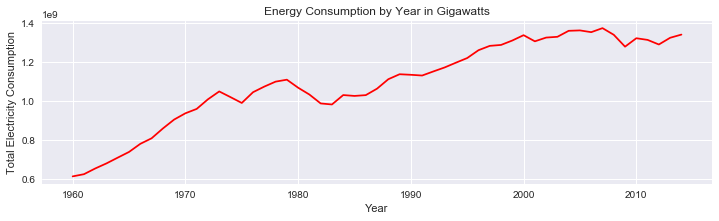

In [10]:
yearly_cons = df1.reset_index()
yearly_cons.head()
yearly_cons=yearly_cons.groupby('year').sum()

fig, axes = plt.subplots(figsize = (12,3))

axes.plot(yearly_cons, 'r')
axes.set_xlabel('Year')
axes.set_ylabel('Total Electricity Consumption')
axes.set_title('Energy Consumption by Year in Gigawatts');
plt.show()


In [11]:
#Get yearly consumption by state, and pair that with total consumption for the year
yearly_cons = yearly_cons.reset_index()
copy2 = copy2.reset_index()

percentage_copy = copy2.merge(yearly_cons, how = 'outer', on = ['year'])


In [12]:
#make a new row that shows what percent of generation the given state was during every year
percentage_copy['Percent of Yearly Consumption'] = 100*percentage_copy['sumgen_x']/percentage_copy['sumgen_y']

In [13]:
#Unsurprisingly California, Texas, New York, and Pennsylvania use a lot of energy

In [14]:
sorted_states = percentage_copy.sort_values(['year','Percent of Yearly Consumption','year'])

In [15]:
#break up generation by state and by year. This will allow us to make area graphs showing not
#only the change in consumption over time, but which states grew and and at what rate.
tot_gen_by_st = df1.unstack('state')

tot_gen_by_st.columns= tot_gen_by_st.columns.droplevel(0)


tot_gen_by_st.head()
tot_gen_by_st.to_csv('by_st_gen')

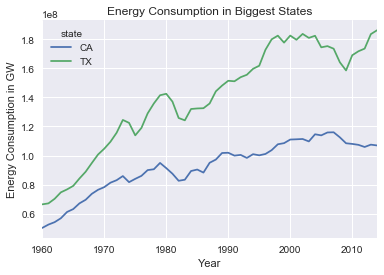

In [16]:
states = tot_gen_by_st
states.plot(y = ['CA','TX'])
plt.xlabel('Year')
plt.ylabel('Energy Consumption in GW')
plt.title('Energy Consumption in Biggest States')
plt.show()

## The first dataframe makes it easy to see how states contribute to the mix over a longer time frame, but the second one will give us a nice breakdown of generation type/fuel type, which is more what we're interested in. Eventually I'll go back in Bokeh or something and make it more interactive.

In [17]:
df2 = pd.read_excel('annual_generation_state.xls', skiprows = 1)


In [18]:
df2.columns = ['year','state','type','input_type','gen_by_type']
df2.head()

,year,state,type,input_type,gen_by_type
0,1990,AK,Total Electric Power Industry,Total,5599506.0
1,1990,AK,Total Electric Power Industry,Coal,510573.0
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521.0
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261.0
4,1990,AK,Total Electric Power Industry,Petroleum,497116.0


### We're gonna quickly figure out which generation is biggest in each state as a sum of all years. Because our data is relatively short term, I think this will give us an idea of what direction a state is taking in regards to its energy mix.

In [19]:
state_list = df2.state.unique()


In [50]:
state_gen = df2.set_index('year').groupby(['state','input_type']).sum()
state_gen = state_gen.reset_index()

In [55]:
state_gen = state_gen[state_gen.input_type != 'Total']

idx = state_gen.groupby(['state'])['gen_by_type'].transform(max) == state_gen['gen_by_type']
state_gen_type = state_gen[idx]
state_gen_type.head()
state_gen_type.to_csv('st_gen_max.csv')

In [22]:
totals_type = df2.groupby(['year','type']).sum()
totals_type = totals_type.unstack('type')



In [23]:
totals_type.reset_index(0, col_level= 0)
totals_type.to_csv('type_gen')

In [24]:
totals_type.columns= totals_type.columns.droplevel(0)


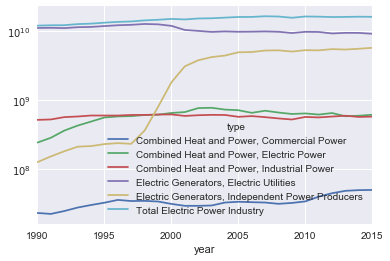

In [29]:
totals_type.plot(logy = True)
#probably gonna make this a log graph

In [26]:
df_totals_input = df2.groupby(['year','input_type']).sum()

df_totals_input = df_totals_input.reset_index()
df_totals_input.columns = [c[-1] for c in df_totals_input.columns]





In [27]:
df_totals_input.columns = ['year','input_type','gen_amt']
df_totals_input.set_index(['year'])


df_totals_input = df_totals_input.pivot(index='year', columns='input_type', values='gen_amt')
df_totals_input.to_csv('input_type')

In [42]:
inputs1 = df_totals_input.iloc[:,:7]
inputs2 = df_totals_input.iloc[:,7:]

inputs1.head(10)

input_type,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass
year,,,,,,,
1990,6.376046e+09,61737084.0,1.171463e+09,1.491061e+09,2.307447e+09,14462650.0,53041506.0
1991,6.362491e+09,63865778.0,1.155977e+09,1.526212e+09,2.450260e+09,18955396.0,62658984.0
1992,6.484824e+09,64551848.0,1.012352e+09,1.616298e+09,2.475105e+09,14879552.0,71264132.0
1993,6.760281e+09,67154260.0,1.121976e+09,1.659707e+09,2.441165e+09,13948624.0,73332118.0
1994,6.762775e+09,62141814.0,1.040503e+09,1.840875e+09,2.561759e+09,14667702.0,76514388.0
1995,6.837706e+09,53513032.0,1.243331e+09,1.984232e+09,2.693608e+09,16415232.0,81619890.0
1996,7.180782e+09,57314736.0,1.388648e+09,1.820222e+09,2.698914e+09,14285118.0,83645358.0
1997,7.380063e+09,58904408.0,1.425813e+09,1.917595e+09,2.514577e+09,14447956.0,86836304.0
1998,7.494063e+09,59095672.0,1.293343e+09,2.125028e+09,2.694808e+09,14285640.0,89791750.0


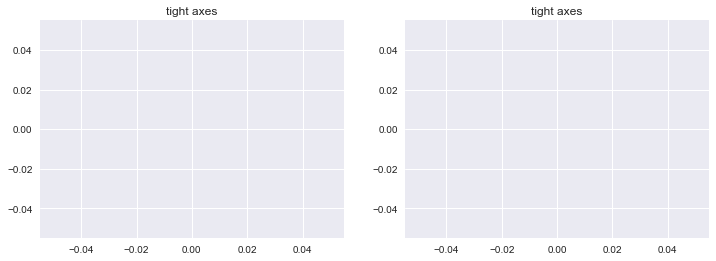

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(y = inputs1[1:], logy = True )
axes[0].axis('tight')
axes[0].set_title("tight axes")

axes[1].plot( y = inputs2[1:], logy = True )
axes[1].axis('tight')
axes[1].set_title("tight axes")


plt.show()